This model is a loan approval model. It uses features of the dataset provided to train and tested in unseen data to deliver predictions.

IMPORTANT IMPORTS

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET

In [47]:
train_set = pd.read_csv("C:/Datasets/train (2).csv")
train_set

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2,EDUCATION,A,5000,8.90,0.17,N,3,0


In [48]:
test_set = pd.read_csv("C:/Datasets/test (4).csv")
test_set

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4,PERSONAL,D,14000,15.62,0.39,Y,4


GET INFORMATION ON THE TRAIN SET

In [49]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  int64  
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(2), int64(7), object

CHECK FOR MISSING VALUES

In [50]:
train_set.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [51]:
test_set.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

DATA TYPES

In [52]:
train_set.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length               int64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [53]:
train_set["person_home_ownership"]

0            RENT
1             OWN
2             OWN
3            RENT
4            RENT
           ...   
58640    MORTGAGE
58641        RENT
58642        RENT
58643        RENT
58644    MORTGAGE
Name: person_home_ownership, Length: 58645, dtype: object

EXPLORATORY DATA ANALYSIS

LOAN APPLICANTS HOME OWNERSHIP VISUALIZATION

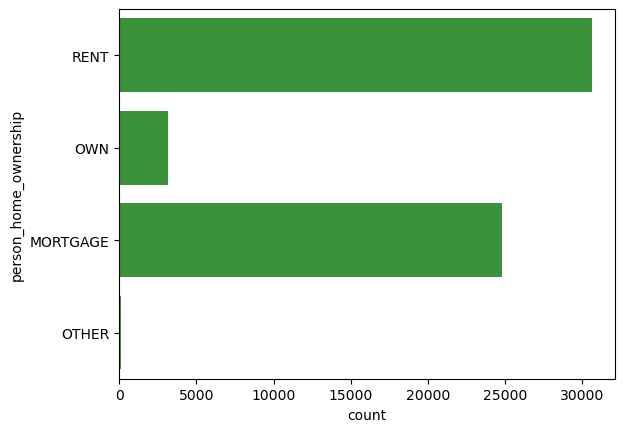

In [54]:
base_color = sns.color_palette()[2]
sns.countplot(data=train_set, y='person_home_ownership', color=base_color);

LOAN INTENTION VISUALIZATION

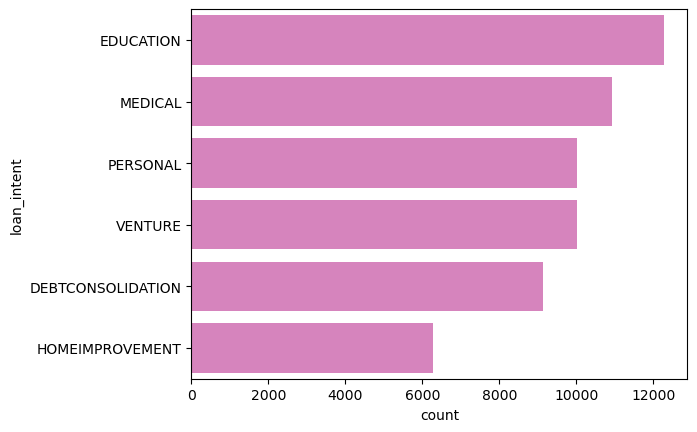

In [55]:
base_color = sns.color_palette()[6]
sns.countplot(data=train_set, y='loan_intent', color=base_color);

HOME OWNERSHIP VERSUS INCOME VISUALIZATION

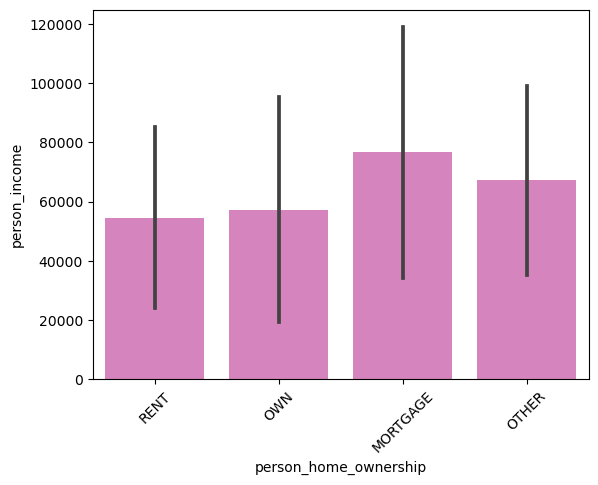

In [56]:
sns.barplot(data=train_set, x='person_home_ownership', y='person_income', color=base_color, errwidth=0)
sns.barplot(data=train_set, x='person_home_ownership', y='person_income', color = base_color, errorbar='sd')
plt.xticks(rotation = 45);

AGES OF LOANS APPLICANTS.

Applicants applying more for loan are in the ages 22 to 27 where most of the applicants are age 23. It is also important to note that the trend in the bars show that as people get older they become less interested in loan application. Most people that apply for loans are at their early to mid twenties.

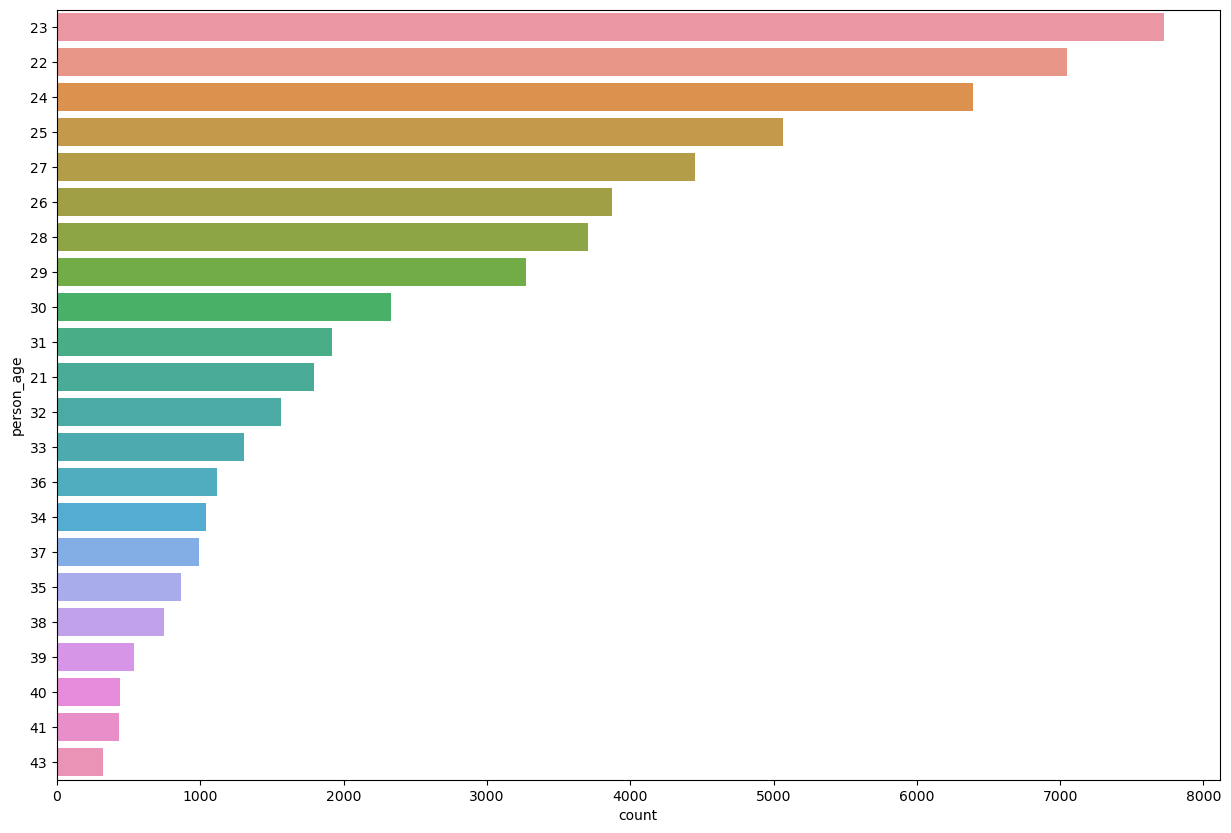

In [57]:
order_train_set = train_set['person_age'].value_counts().iloc[:22].index
plt.figure(figsize=(15,10))
sns.countplot(y='person_age', data=train_set, order = order_train_set);

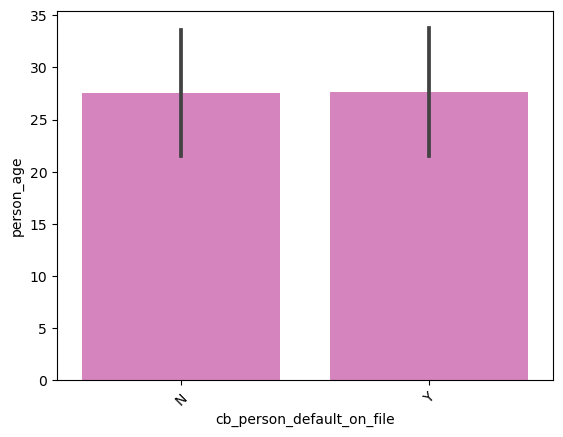

In [58]:
sns.barplot(data=train_set, x='cb_person_default_on_file', y='person_age', color=base_color, errwidth=0)
sns.barplot(data=train_set, x='cb_person_default_on_file', y='person_age', color = base_color, errorbar='sd')
plt.xticks(rotation = 45);

PREPARE DATA FOR MACHINE LEARNING ALGORITHM

In [59]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_set['person_home_ownership']=labelencoder.fit_transform(train_set['person_home_ownership'])
train_set['loan_intent']=labelencoder.fit_transform(train_set['loan_intent'])
train_set['loan_grade']=labelencoder.fit_transform(train_set['loan_grade'])
train_set['cb_person_default_on_file']=labelencoder.fit_transform(train_set['cb_person_default_on_file'])

train_set

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,2,6,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2,3,0,6000,6.92,0.10,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,0,5,1,3,25000,15.95,0.21,1,10,0
58641,58641,28,28800,3,0,3,2,10000,12.73,0.35,0,8,1
58642,58642,23,44000,3,7,1,3,6800,16.00,0.15,0,2,1
58643,58643,22,30000,3,2,1,0,5000,8.90,0.17,0,3,0


In [60]:
train_set.describe()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,1.673578,4.701015,2.519430,1.066638,9217.556518,10.677874,0.159238,0.148384,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,1.452534,3.959784,1.722896,1.046181,5563.807384,3.034697,0.091692,0.355484,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,7.880000,0.090000,0.000000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,3.000000,4.000000,3.000000,1.000000,8000.000000,10.750000,0.140000,0.000000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,3.000000,7.000000,4.000000,2.000000,12000.000000,12.990000,0.210000,0.000000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,3.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,30.000000,1.000000


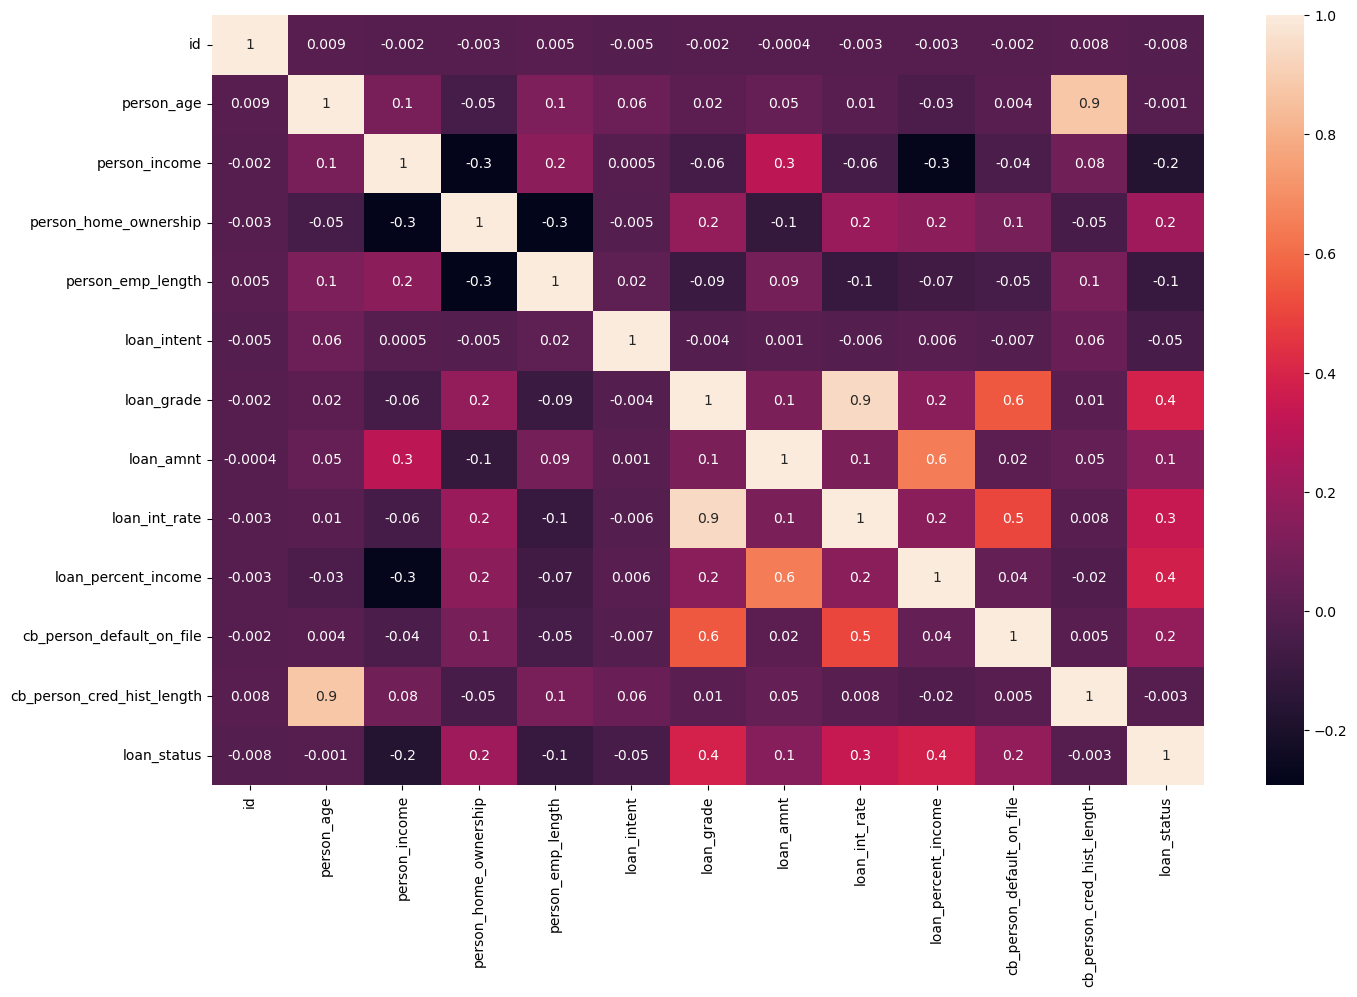

In [61]:
from pandas import set_option
data = train_set
data = data
set_option('display.width',200)
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot = True, fmt='.1g');

In [62]:
skew = train_set.skew()
print(skew)

id                             0.000000
person_age                     1.965497
person_income                 10.457723
person_home_ownership         -0.249741
person_emp_length              2.054430
loan_intent                   -0.011529
loan_grade                     0.869415
loan_amnt                      1.188578
loan_int_rate                  0.200020
loan_percent_income            0.917473
cb_person_default_on_file      1.978306
cb_person_cred_hist_length     1.618503
loan_status                    2.046848
dtype: float64


In [63]:
train_set.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
id,0.000000,-1.200000
person_age,1.965497,6.408380
person_income,10.457723,342.629353
person_home_ownership,-0.249741,-1.891081
person_emp_length,2.054430,29.131606
loan_intent,-0.011529,-1.332577
loan_grade,0.869415,0.356587
loan_amnt,1.188578,1.693784
loan_int_rate,0.200020,-0.718153
loan_percent_income,0.917473,0.631343


UNIVARIATE HISTOGRAM

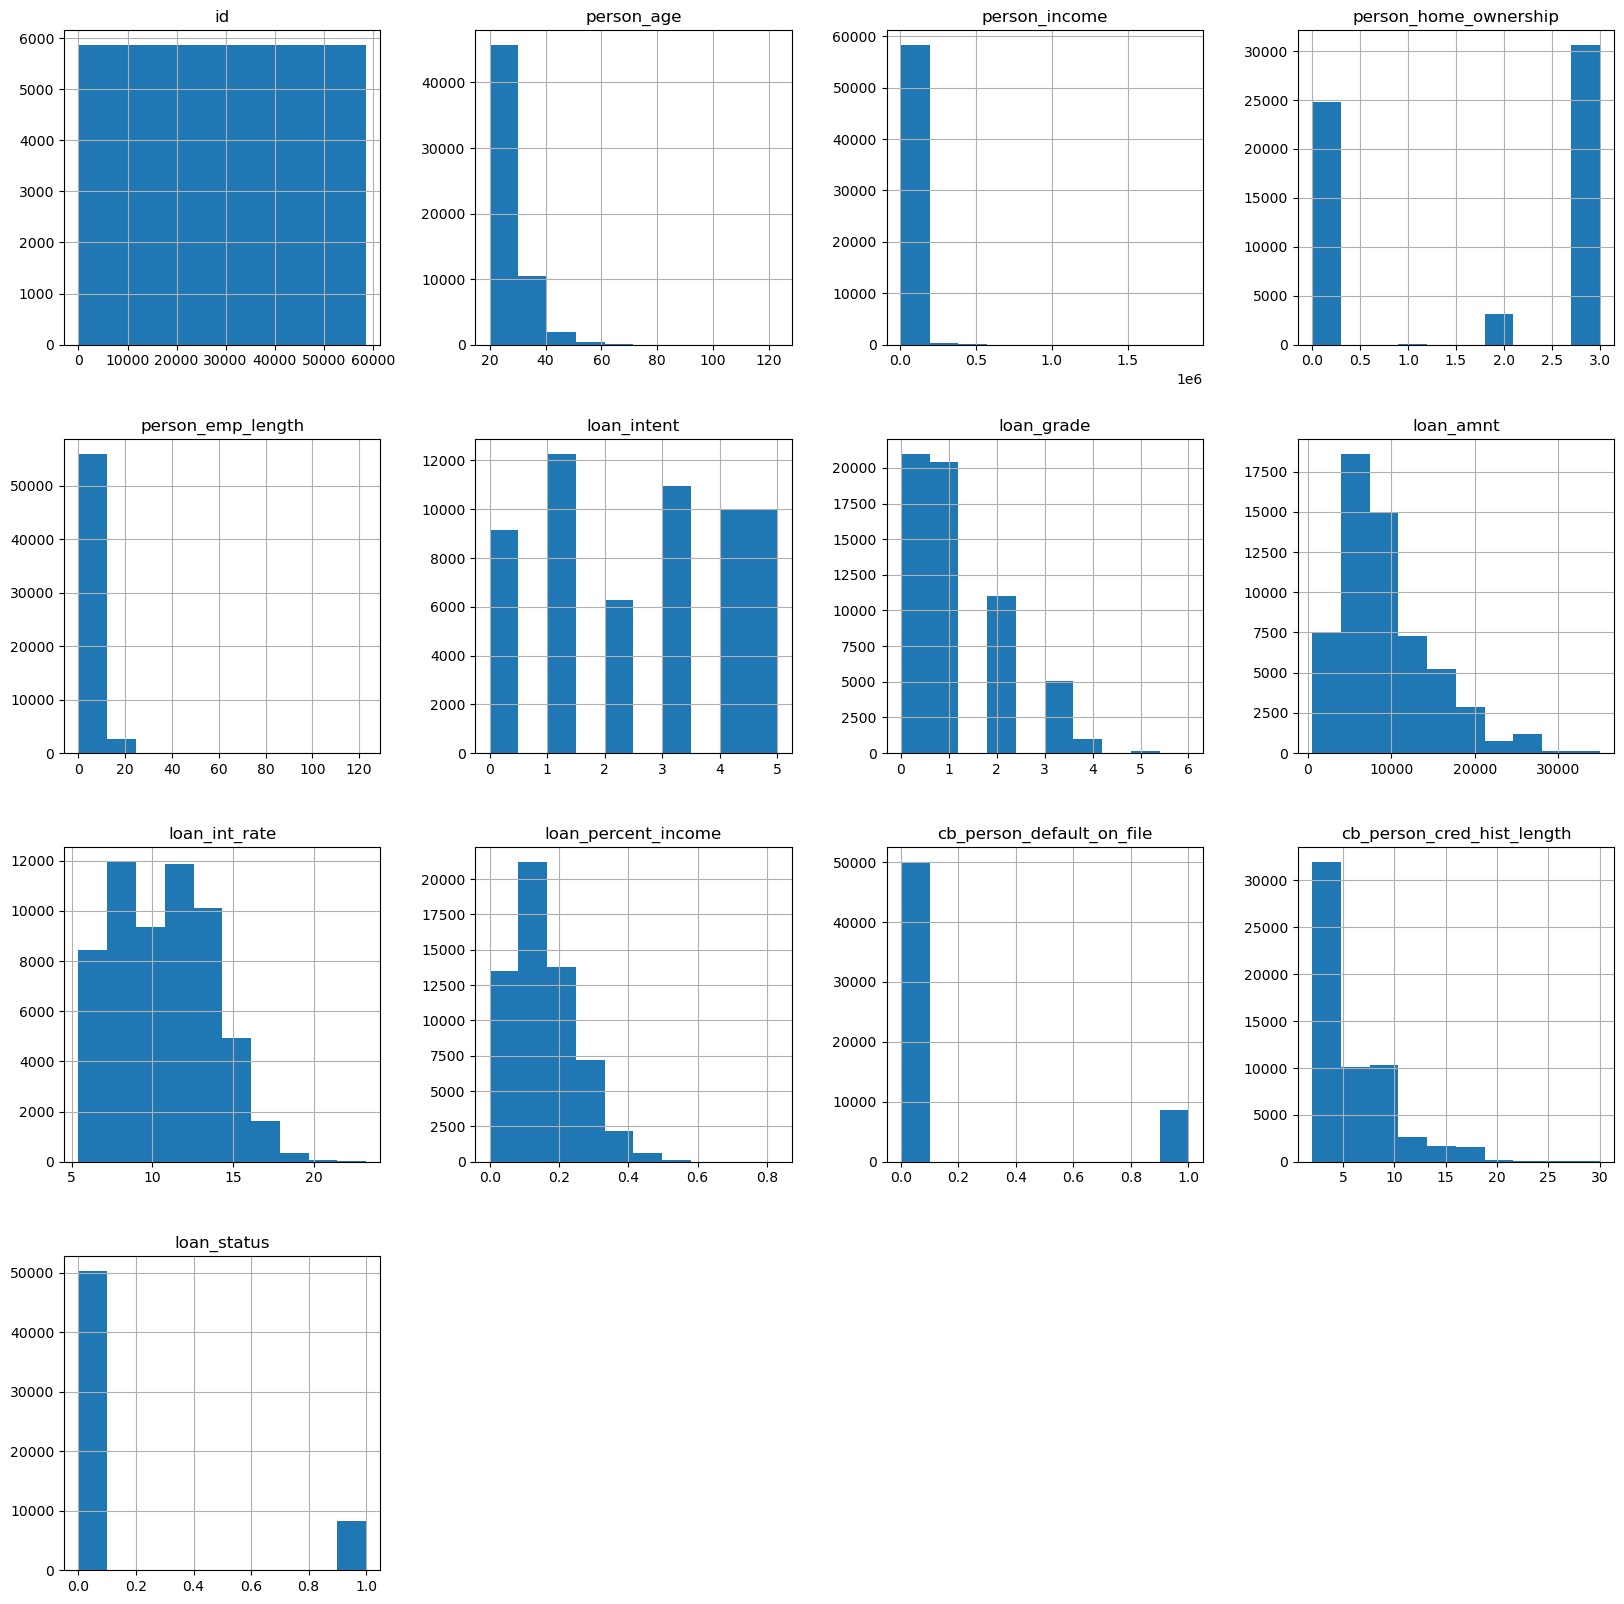

In [64]:
from matplotlib import pyplot
train_set.hist()
plt.gcf().set_size_inches(20,20)
pyplot.show()

BOXPLOT VISUALIZATION

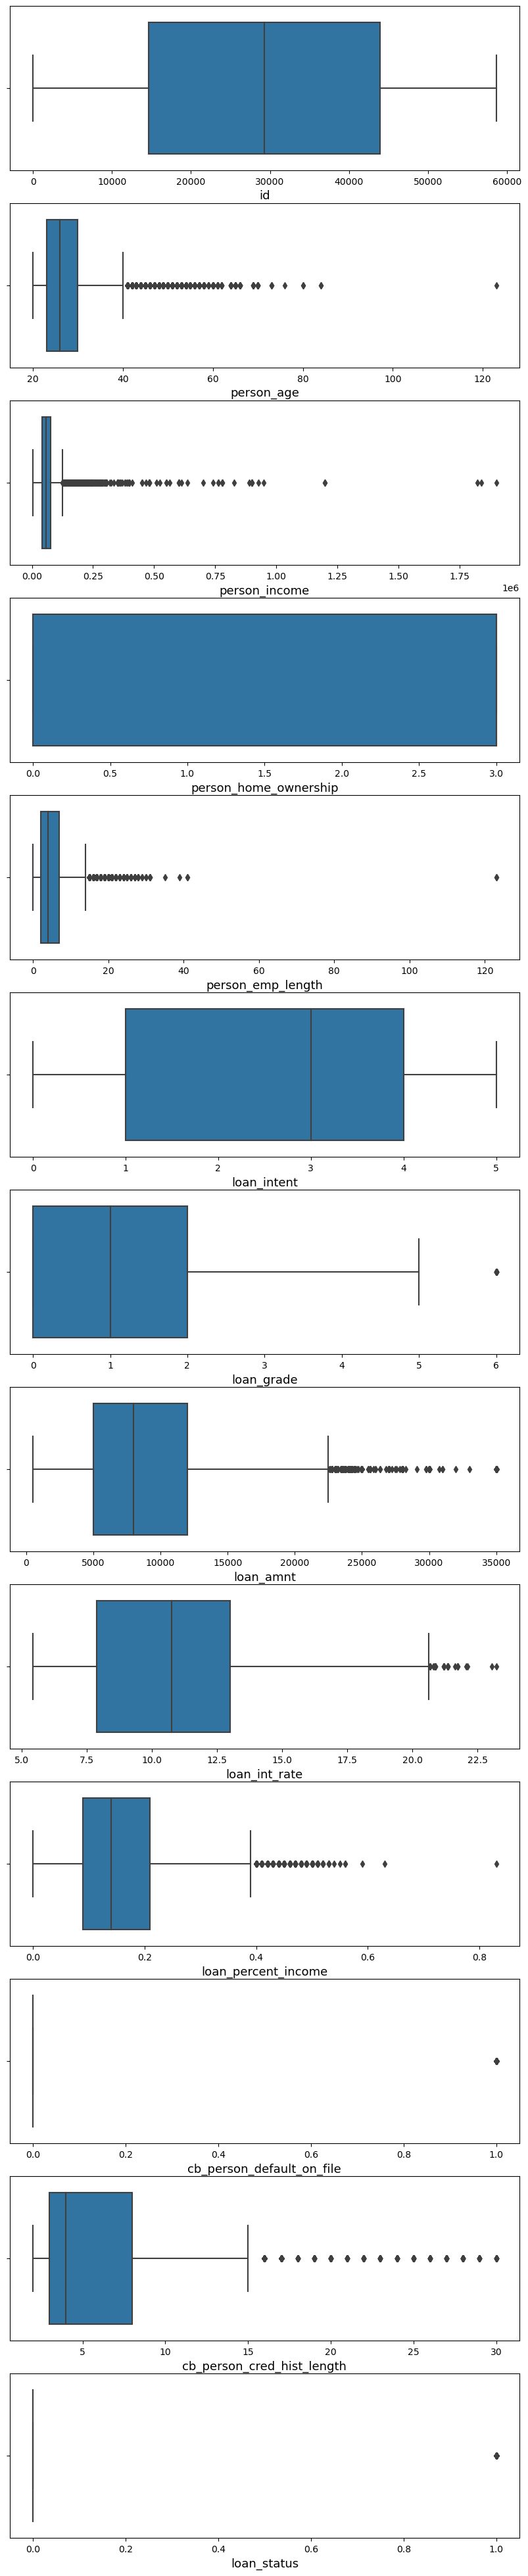

In [65]:
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize = (10, 50))
for i in range (len(train_set.columns)):
    plt.subplot(13, 1, i+1)
    sns.boxplot(x = train_set.iloc[:, i])
    plt.xlabel(train_set.columns[i], size = 13) 

CHECK FOR AND REMOVE OUTLIERS

In [66]:
def Outliers(train_set, feature):
    IQ1 = train_set[feature].quantile(0.25)
    IQ3 = train_set[feature].quantile(0.75)
    IQR = IQ3 - IQ1
    
    lower_bound = IQ1 - 1.5 * IQR
    upper_bound = IQ3 + 1.5 * IQR
    
    index = train_set.index[ (train_set[feature] < lower_bound) | (train_set[feature] > upper_bound) ]
    return index 

In [67]:
index = []
for i in train_set.columns:
    index.extend(Outliers(train_set, i))
index = set(index)
print("Total number of outliers are {}".format(len(index)))
train_set.drop(index, inplace = True, axis = 0)
train_set.shape  

Total number of outliers are 20404


(38241, 13)

TAKE OUT THE OUTLIERS

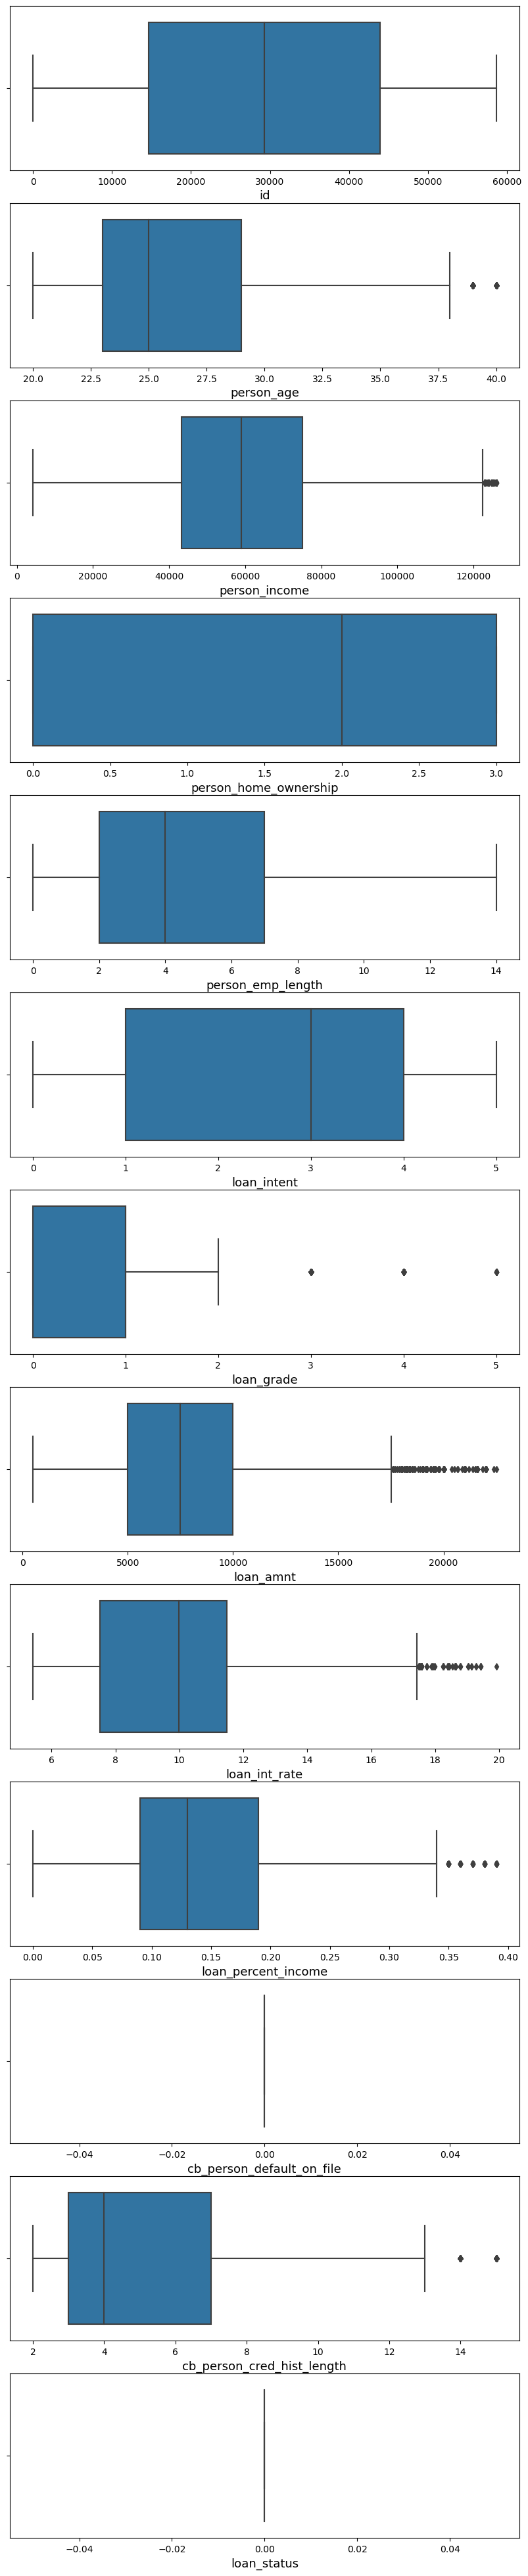

In [68]:
plt.figure(figsize = (10, 50))
for i in range (len(train_set.columns)):
    plt.subplot(13, 1, i+1)
    sns.boxplot(x = train_set.iloc[:, i])
    plt.xlabel(train_set.columns[i], size = 13) 

In [69]:
train_set2 = train_set
train_set2.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,2,6,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2,3,0,6000,6.92,0.10,0,3,0


In [70]:
train_set2.shape

(38241, 13)

In [76]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df = train_set2
array = df.values
X_train = array[0:80,0:12]
Y_train = array[0:80,12]
X_val = array[80:,0:12]
Y_val = array[80:,12]
num_folds = 10
kfold = KFold(n_splits=num_folds)#, shuffle = True, random_state=7)
model = LinearDiscriminantAnalysis()
model.fit(X_train,Y_train)
results = cross_val_score(model, X_val, Y_val, cv=kfold)
score = np.mean(results)
preds = model.predict(X_val)
print(results)
print(score*100)
print(preds)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
100.0
[0. 0. 0. ... 0. 0. 0.]


MODEL PERFORMANCE ON TEST SET

In [77]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test_set['person_home_ownership']=labelencoder.fit_transform(test_set['person_home_ownership'])
test_set['loan_intent']=labelencoder.fit_transform(test_set['loan_intent'])
test_set['loan_grade']=labelencoder.fit_transform(test_set['loan_grade'])
test_set['cb_person_default_on_file']=labelencoder.fit_transform(test_set['cb_person_default_on_file'])

test_set

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,3,3,2,5,25000,15.76,0.36,0,2
1,58646,26,96000,0,6,4,2,10000,12.68,0.10,1,4
2,58647,26,30000,3,5,5,4,4000,17.19,0.13,1,2
3,58648,33,50000,3,4,0,0,7000,8.90,0.14,0,7
4,58649,26,102000,0,8,2,3,15000,16.32,0.15,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,0,2,0,1,3000,10.37,0.10,0,4
39094,97739,22,48000,0,6,1,0,7000,6.03,0.15,0,3
39095,97740,51,60000,0,0,4,0,15000,7.51,0.25,0,25
39096,97741,22,36000,0,4,4,3,14000,15.62,0.39,1,4


SPLIT DATA INTO XTRAIN AND YTRAIN

In [79]:
ytrain = train_set2.iloc[:,12] 

ytrain

0        0
1        0
2        0
3        0
4        0
        ..
58634    0
58637    0
58639    0
58643    0
58644    0
Name: loan_status, Length: 38241, dtype: int64

In [80]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
#from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB 
#from lightgbm import LGBMClassifier 
#from catboost import CatBoostClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, mean_squared_error, f1_score, precision_score, recall_score 

In [81]:
xtrain,xtest,ytrain,ytest = train_test_split(xtrain,ytrain, test_size = 0.2, random_state = 42) 

In [82]:
def Models(model,name,d): 
    print('Working on {} model'.format(name)) 
    cla = model 
    cla.fit(xtrain, ytrain) 
    predicted = cla.predict(xtrain) 
    tr_auc = accuracy_score(predicted,ytrain)*100 
    
    predicted = cla.predict(xtest) 
    te_auc = accuracy_score(predicted,ytest)*100 
    Recall = recall_score(predicted,ytest,average = 'micro') 
    Precision = precision_score(predicted,ytest,average = 'micro') 
    F1 = f1_score(predicted,ytest,average = 'micro') 
    MSE = mean_squared_error(predicted,ytest) 
    d['name'].append(name) 
    d['Training ACU'].append(tr_auc) 
    d['Testing ACU'].append(te_auc) 
    d['Recall'].append(Recall) 
    d['Precision'].append(Precision) 
    d['F1_score'].append(F1)
    d['MSE'].append(MSE) 
    
    print('*************'*5) 
    print() 
    return d 

In [83]:
d = {'name' : [], 'Training ACU' : [], 'Testing ACU' : [], 'Recall' : [], 'Precision' : [], 'F1_score' : [], 'MSE' : []} 
models = [[RandomForestClassifier(n_estimators = 350), 'Random Forest'], [DecisionTreeClassifier(), 'Decision Tree'],[GaussianNB(), 'GaussianNB']] 
for model in models:
    d = Models(model[0], model[1], d) 
    
acu_data = pd.DataFrame(data = d) 

Working on Random Forest model
*****************************************************************

Working on Decision Tree model
*****************************************************************

Working on GaussianNB model
*****************************************************************



In [84]:
acu_data

,name,Training ACU,Testing ACU,Recall,Precision,F1_score,MSE
0,Random Forest,100.0,100.0,1.0,1.0,1.0,0.0
1,Decision Tree,100.0,100.0,1.0,1.0,1.0,0.0
2,GaussianNB,100.0,100.0,1.0,1.0,1.0,0.0


In [85]:
xtest2 = test_set.iloc[:,0:12] 

xtest2

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,3,3,2,5,25000,15.76,0.36,0,2
1,58646,26,96000,0,6,4,2,10000,12.68,0.10,1,4
2,58647,26,30000,3,5,5,4,4000,17.19,0.13,1,2
3,58648,33,50000,3,4,0,0,7000,8.90,0.14,0,7
4,58649,26,102000,0,8,2,3,15000,16.32,0.15,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,0,2,0,1,3000,10.37,0.10,0,4
39094,97739,22,48000,0,6,1,0,7000,6.03,0.15,0,3
39095,97740,51,60000,0,0,4,0,15000,7.51,0.25,0,25
39096,97741,22,36000,0,4,4,3,14000,15.62,0.39,1,4


In [86]:
# Decision Tree Prediction of test set

model=DecisionTreeClassifier()
cla = model
cla.fit(xtrain, ytrain)
y_predict = cla.predict(xtest2)

y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
col=['loan_status']
predicted_result = pd.DataFrame(y_predict, columns=col)
predicted_result

,loan_status
0,0
1,0
2,0
3,0
4,0
...,...
39093,0
39094,0
39095,0
39096,0


In [88]:
test_set['id']

0        58645
1        58646
2        58647
3        58648
4        58649
         ...  
39093    97738
39094    97739
39095    97740
39096    97741
39097    97742
Name: id, Length: 39098, dtype: int64

In [92]:
test_id = pd.DataFrame(test_set['id'])
test_id

,id
0,58645
1,58646
2,58647
3,58648
4,58649
...,...
39093,97738
39094,97739
39095,97740
39096,97741


In [98]:
frames = [test_id, predicted_result]
submission=pd.concat([test_id, predicted_result], axis=1)

In [96]:
submission

,id,loan_status
0,58645,0
1,58646,0
2,58647,0
3,58648,0
4,58649,0
...,...,...
39093,97738,0
39094,97739,0
39095,97740,0
39096,97741,0


In [100]:
submission.to_csv('submission.csv', index=False)

In [102]:
submission.to_csv(r'\Users\Admin\Desktop\submission.csv', index=False)